<a href="https://colab.research.google.com/github/jaesung93/CNN_tutorial-tensorflow-/blob/master/CNN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Tutorial 10/21")

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0-rc1


In [2]:
# Load dataset
cifar10 = keras.datasets.cifar10

print(cifar10)

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<module 'tensorflow.python.keras.api._v1.keras.datasets.cifar10' from '/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/api/_v1/keras/datasets/cifar10/__init__.py'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
class_names =  ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

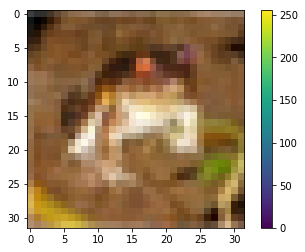

In [4]:
# Cifar10 example
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

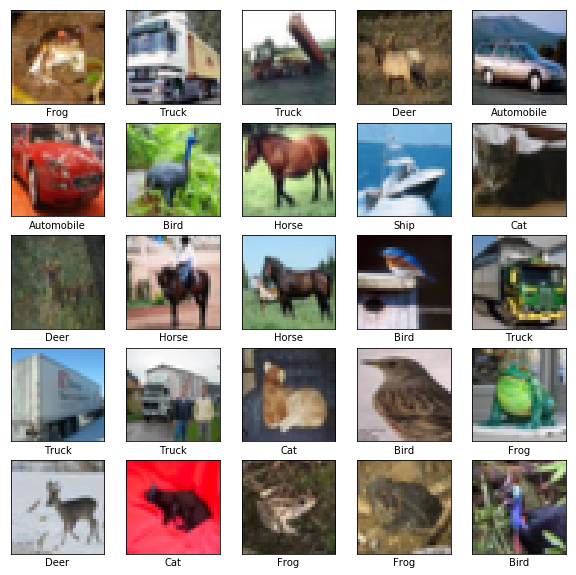

In [6]:
# Show images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
# For logging
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    self.epoch_val_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
   
  def on_epoch_end(self, epoch, logs=None):
    self.epoch_val_acc.append(logs['val_acc'])

In [8]:
# Fully connected network
fc_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(28*28*8, activation=tf.nn.relu),
    keras.layers.Dense(24*24*8, activation=tf.nn.relu),
    keras.layers.Reshape((24, 24, 8)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8*8*16, activation=tf.nn.relu),
    keras.layers.Dense(4*4*16, activation=tf.nn.relu),
    keras.layers.Reshape((4, 4, 16)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
fc_model.summary()

W0628 07:26:59.000332 140446623430528 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 6272)              19273856  
_________________________________________________________________
dense_1 (Dense)              (None, 4608)              28905984  
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1

In [0]:
# Compile fully connected network
fc_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
)

In [10]:
# Train fully connected network
fc_batch_stats = CollectBatchStats()

fc_model.fit(train_images, train_labels,
             batch_size=128,
             epochs=50,
             callbacks=[fc_batch_stats],
             validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 169us/sample - loss: 1.8014 - acc: 0.3518 - val_loss: 1.6869 - val_acc: 0.3928
Epoch 2/50
50000/50000 [==============================] - 7s 132us/sample - loss: 1.6092 - acc: 0.4232 - val_loss: 1.5454 - val_acc: 0.4484
Epoch 3/50
50000/50000 [==============================] - 7s 132us/sample - loss: 1.5222 - acc: 0.4565 - val_loss: 1.4997 - val_acc: 0.4684
Epoch 4/50
50000/50000 [==============================] - 7s 133us/sample - loss: 1.4621 - acc: 0.4757 - val_loss: 1.5306 - val_acc: 0.4498
Epoch 5/50
50000/50000 [==============================] - 7s 134us/sample - loss: 1.4034 - acc: 0.4976 - val_loss: 1.4171 - val_acc: 0.4990
Epoch 6/50
50000/50000 [==============================] - 7s 134us/sample - loss: 1.3700 - acc: 0.5120 - val_loss: 1.4365 - val_acc: 0.4937
Epoch 7/50
50000/50000 [==============================] - 7s 135us/sample - loss: 1.3149 - acc: 0.5289 - val_l

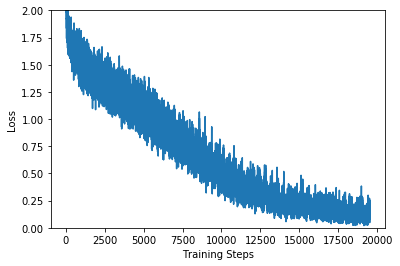

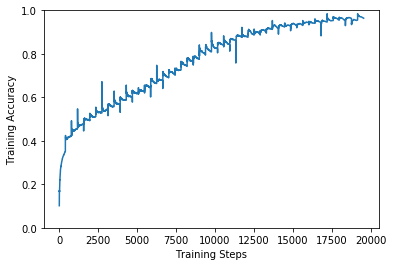

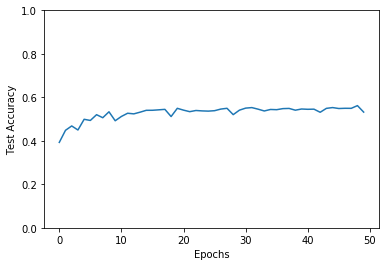

In [11]:
# show train losses, train accuracy, test accuracy
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_batch_stats.epoch_val_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         1608      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          6416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

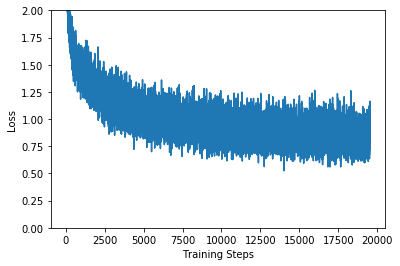

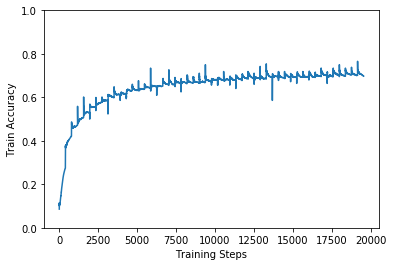

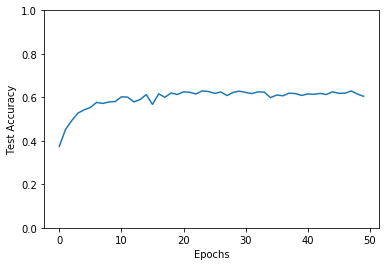

In [12]:
# Convolutional neural network
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.nn.relu, input_shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.nn.relu),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(16, 5, activation=tf.nn.relu),
    keras.layers.Conv2D(16, 5, activation=tf.nn.relu),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
cnn_model.summary()

# Compile CNN model
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

cnn_batch_stats = CollectBatchStats()

# Train CNN model
cnn_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=50,
              callbacks=[cnn_batch_stats],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(cnn_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.epoch_val_acc)

10000/10000 [==============================] - 1s 80us/sample - loss: 1.1595 - acc: 0.6046
fc test accuracy : 0.5321
cnn test accuracy : 0.6046


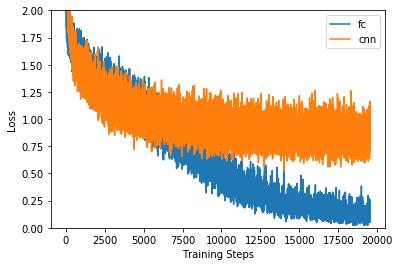

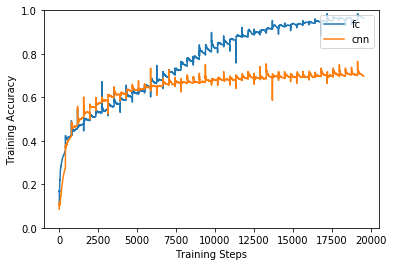

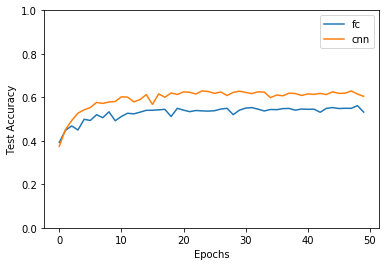

In [19]:
# Compare fully-connected network and CNN network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_batch_stats.batch_losses, label='fc')
plt.plot(cnn_batch_stats.batch_losses, label='cnn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_batch_stats.batch_acc, label='fc')
plt.plot(cnn_batch_stats.batch_acc, label='cnn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_batch_stats.epoch_val_acc, label='fc')
plt.plot(cnn_batch_stats.epoch_val_acc, label='cnn')
plt.legend(loc='upper right')

fc_test_loss, fc_test_acc = fc_model.evaluate(test_images, test_labels)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)

print('fc test accuracy : ' + str(fc_test_acc))
print('cnn test accuracy : ' + str(cnn_test_acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 16, 16, 64)       

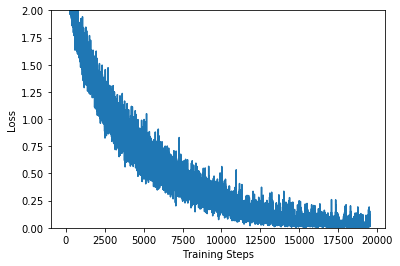

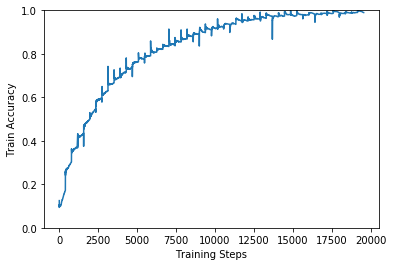

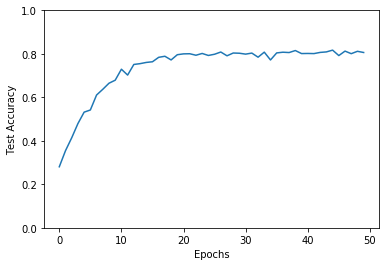

In [20]:
# VGG network
vgg_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', input_shape=(32, 32, 3)),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.AveragePooling2D(pool_size=(8, 8)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
vgg_model.summary()

vgg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

vgg_batch_stats = CollectBatchStats()

vgg_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=50,
              callbacks=[vgg_batch_stats],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.epoch_val_acc)


vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)
print('VGG test accuracy : ' + str(vgg_test_acc))

10000/10000 [==============================] - 1s 122us/sample - loss: 1.1658 - acc: 0.8062
simple cnn test accuracy : 0.6046
vgg test accuracy : 0.8062


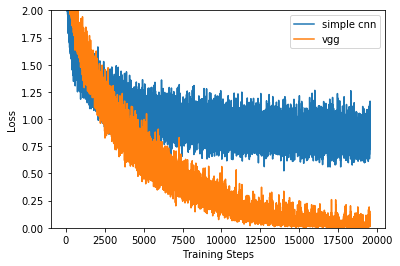

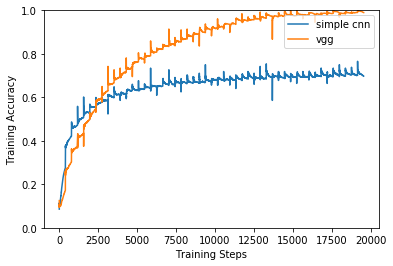

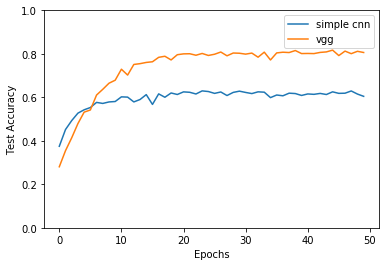

In [21]:
# Compare simple CNN network and VGG network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(cnn_batch_stats.batch_losses, label='simple cnn')
plt.plot(vgg_batch_stats.batch_losses, label='vgg')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.batch_acc, label='simple cnn')
plt.plot(vgg_batch_stats.batch_acc, label='vgg')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.epoch_val_acc, label='simple cnn')
plt.plot(vgg_batch_stats.epoch_val_acc, label='vgg')
plt.legend(loc='upper right')

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)

print('simple cnn test accuracy : ' + str(cnn_test_acc))
print('vgg test accuracy : ' + str(vgg_test_acc))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_8 (ReLU)                  (None, 32, 32, 32)   0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 32)   9248        re_lu_8[0][0]                    
______________________________________________________________________________________________

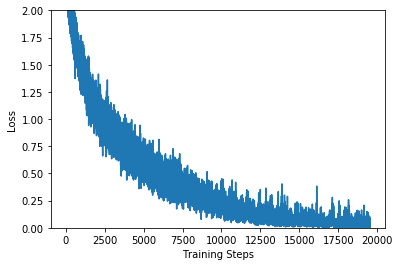

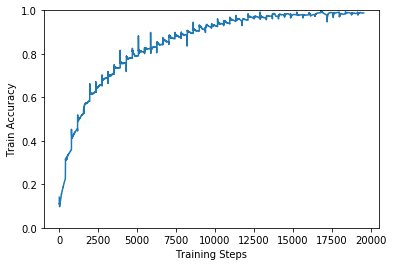

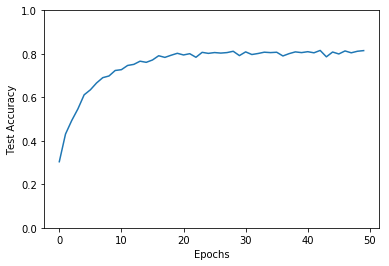

In [22]:
# Residual network
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_model = keras.models.Model(input, output)
resnet_model.summary()

resnet_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_batch_stats = CollectBatchStats()

resnet_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=50,
              callbacks=[resnet_batch_stats],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc)

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
print('Resnet test accuracy : ' + str(resnet_test_acc))

10000/10000 [==============================] - 1s 111us/sample - loss: 1.2123 - acc: 0.8149
vgg test accuracy : 0.8062
resnet test accuracy : 0.8149


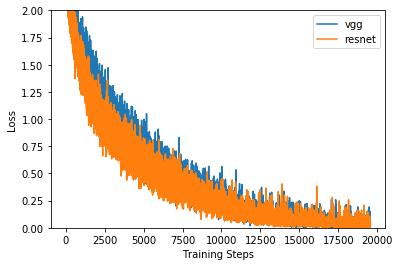

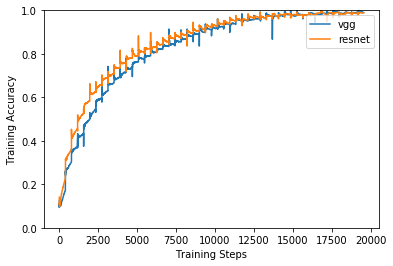

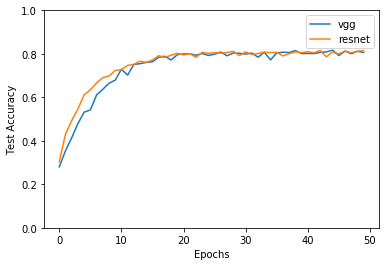

In [23]:
# Compare VGG network and Residual network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_batch_stats.batch_losses, label='vgg')
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.batch_acc, label='vgg')
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.epoch_val_acc, label='vgg')
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.legend(loc='upper right')

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)

print('vgg test accuracy : ' + str(vgg_test_acc))
print('resnet test accuracy : ' + str(resnet_test_acc))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d_20[0][0]                  
__________________________________________________________________________________________________
re_lu_16 (ReLU)                 (None, 32, 32, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

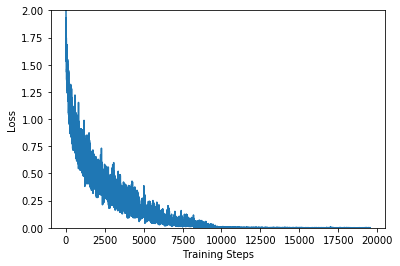

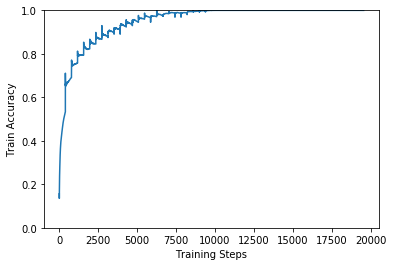

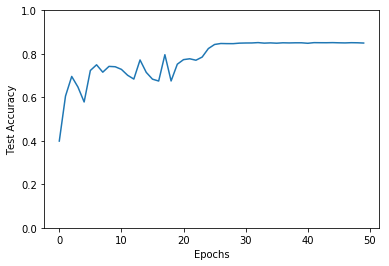

In [24]:
# Residual network with batch normalization
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_bn_model = keras.models.Model(input, output)
resnet_bn_model.summary()

resnet_bn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_bn_batch_stats = CollectBatchStats()

resnet_bn_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=50,
              callbacks=[resnet_bn_batch_stats],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_bn_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_bn_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_bn_batch_stats.epoch_val_acc)

resnet_bn_test_loss, resnet_bn_test_acc = resnet_bn_model.evaluate(test_images, test_labels)
print('Resnet with BN test accuracy : ' + str(resnet_bn_test_acc))

10000/10000 [==============================] - 1s 129us/sample - loss: 0.7238 - acc: 0.8497
resnet test accuracy : 0.8149
resnet with bn test accuracy : 0.8497


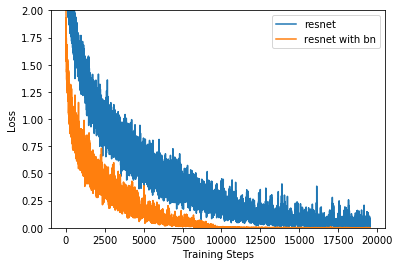

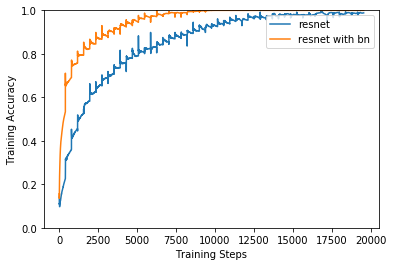

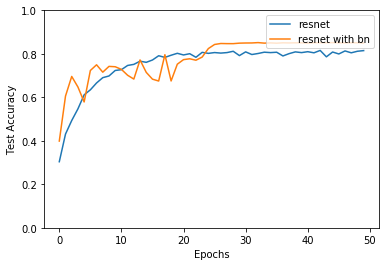

In [30]:
# Compare residual network and residual network with batch normalization
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.plot(resnet_bn_batch_stats.batch_losses, label='resnet with bn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.plot(resnet_bn_batch_stats.batch_acc, label='resnet with bn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.plot(resnet_bn_batch_stats.epoch_val_acc, label='resnet with bn')
plt.legend(loc='upper right')

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
resnet_bh_test_loss, resnet_bn_test_acc = resnet_bn_model.evaluate(test_images, test_labels)

print('resnet test accuracy : ' + str(resnet_test_acc))
print('resnet with bn test accuracy : ' + str(resnet_bn_test_acc))